# Assignment 6

## Generating values according to a probability distribution 

In this part of the assignment you will create a function to generate values of $x$ between 0 and 10 distributed according to 

$$ \frac{1}{\mathcal{N}} \left( 1 + \frac{2}{1+x^2}+ \sin(\sqrt{3 x})^2\right) $$

with 

$$ \mathcal{N} = \int\limits_0^{10} f(x) dx \;.$$

Let's first import the usual suspects:

In [22]:
import matplotlib.pyplot as plt
import numpy
import random

This defines the function:

In [23]:
norm = (181 + 24*numpy.arctan(10)-numpy.cos(2*numpy.sqrt(30))-2*numpy.sqrt(30)*numpy.sin(2*numpy.sqrt(30)))/12

def f(x):
    return  (1 + (2/(1+x**2)+ numpy.sin(numpy.sqrt(3*x))**2))/norm

This plots the function:

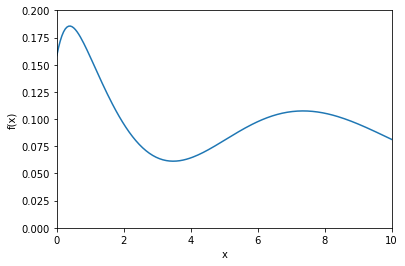

In [24]:
xs = numpy.linspace(0, 10, 200)
fs = f(xs)
plt.plot(xs, fs);
plt.ylabel('f(x)')
plt.xlabel('x')
plt.xlim(0,10)
plt.ylim(0,0.2);

Define a function `genSample` that generates a sample of `npts` values $x$ distributed according to $f(x)$. [5 marks]


In [25]:

def genSample(npts):
    sample = []
    m = 0.2
    while len(sample)<npts:
        Xval = (random.random()*10)
        rVal = (random.random())
        if rVal<f(Xval)/m:
            sample.append(Xval)
    return numpy.array(sample)

In [29]:
# this test is worth 1 mark
testSample = genSample(103)
assert (testSample >= 0).all() 
assert (testSample <= 10).all()
assert len(testSample) == 103

## Plotting task

Make a plot to show that the values generated are distributed in the right manner. The plot should have a title and axis labels. [4 marks]


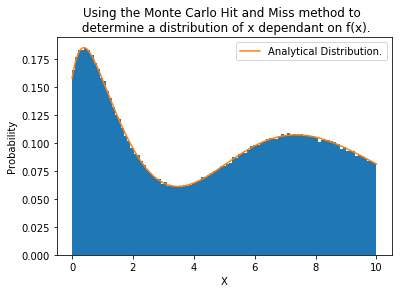

In [31]:
def genSample2(npts):
    sample2 = []
    m = 0.2
    while len(sample2)<npts:
        Xval2 = (random.random()*10)
        rVal2 = (random.random())
        if rVal2<f(Xval2)/m:
            sample2.append(Xval2)
    return numpy.array(sample2)
plt.hist(genSample2(1000000), bins = numpy.linspace(0,10, 100), density= 'true')
plt.xlabel('X')
plt.ylabel('Probability')
plt.title('Using the Monte Carlo Hit and Miss method to \n determine a distribution of x dependant on f(x).')
xs = numpy.linspace(0, 10, 200)
fs = f(xs)
plt.plot(xs, fs, label = 'Analytical Distribution.')
plt.legend()